# PART 1

Please write the codes for part 1 of the project here.

In [169]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import csv
#Umutcan Deliduman 200200028
#Furkan Mat 200200030

In [170]:
headers={"User-Agent":"Chrome (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTM;L, like Gecko) Chrome/97.0.4692.71 Safari/537.36"}

In [171]:
#This code scrapes information about top 10 rollercoasters from the site. Since there is no class or itemprop in html file, it has been used findnext methods.
listrollercoaster=[]
response = requests.get("https://rcdb.com/rhr.htm")
soup = BeautifulSoup(response.content,"html.parser")

toprollercoaster=soup.find_all(text =" mph")
for detail in toprollercoaster:
    name = detail.parent.parent.findNext('a').contents[0]
    speed = detail.findPrevious('td').contents[0].text
    rank = detail.parent.findPrevious('td').contents[0]
    place= detail.findNext('td').findNext('td').contents[0].text
    datetime= detail.findNext('td').findNext('td').findNext('td').find("time")["datetime"]
    link = detail.parent.parent.findNext(href=True).get("href")
    response =requests.get("https://rcdb.com"+link)
    soup=BeautifulSoup(response.content,"html.parser")
    detailpage=soup.find_all(text="Length")
    for x in detailpage:
        length=x.parent.findNext('td').contents[0].text
        height =x.findNext('td').findNext('td').contents[0].text
    listrollercoaster.append([rank,name,speed,place,datetime,length,height])
print(listrollercoaster)

excelfile =pd.DataFrame(listrollercoaster,columns=["Rank","Name","Speed","Place","Opened Date","Length","Height"])
excelfile.to_csv("Top10Rollercoaster.csv",index=False)


[['1st', 'Formula Rossa', '149.1', 'Ferrari World Abu Dhabi', '2010-11-04', '6561.7', '170.6'], ['2nd', 'Kingda Ka', '128', 'Six Flags Great Adventure', '2005-05-21', '3118', '456'], ['*', 'Top Thrill Dragster', '120', 'Cedar Point', '2021-08', '2800', '420'], ['3rd', 'Red Force', '111.8', 'Ferrari Land', '2017-04-07', '2887.2', '367.3'], ['*', 'Do-Dodonpa', '111.8', 'Fuji-Q Highland', '2021-08-13', '4081.3', '160.8'], ['4th', 'Superman: Escape from Krypton', '100', 'Six Flags Magic Mountain', '2011-03-19', '1235', '1235'], ['*', 'Ring Racer', '99.4', 'Nürburgring', '2013-11-04', '3976.3', '123'], ['5th', 'Steel Dragon 2000', '95', 'Nagashima Spa Land', '2006-09-03', '8133.2', '318.3'], ['6th', 'Millennium Force', '93', 'Cedar Point', '2000-05-13', '6595', '310'], ['7th', 'Leviathan', '92', "Canada's Wonderland", '2012-05-06', '5486', '306'], ['8th', 'Orion', '91', 'Kings Island', '2020-07-02', '5321', '287'], ['9th', 'Intimidator 305', '90', 'Kings Dominion', '2010-04-02', '5100', '30

# PART 2
# Introduction

Since Jan. 1, 2015, The Washington Post has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. 

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [172]:
#%pip install --upgrade plotly

## Import Statements

In [173]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [174]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [175]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [176]:
listofdf =[df_fatalities,df_hh_income,df_pct_completed_hs,df_pct_poverty,df_share_race_city]
for df in listofdf:
    print(df.shape)

(2535, 14)
(29322, 3)
(29329, 3)
(29329, 3)
(29268, 7)


In [177]:
for df in listofdf:
    print('\nDataFrame Shape :', df.shape)
    print('\nNumber of Rows :', df.shape[0])
    print('\nNumber of Columns :', df.shape[1])



DataFrame Shape : (2535, 14)

Number of Rows : 2535

Number of Columns : 14

DataFrame Shape : (29322, 3)

Number of Rows : 29322

Number of Columns : 3

DataFrame Shape : (29329, 3)

Number of Rows : 29329

Number of Columns : 3

DataFrame Shape : (29329, 3)

Number of Rows : 29329

Number of Columns : 3

DataFrame Shape : (29268, 7)

Number of Rows : 29268

Number of Columns : 7


In [178]:
for df in listofdf:
    for col in df.columns:
        print(col)

id
name
date
manner_of_death
armed
age
gender
race
city
state
signs_of_mental_illness
threat_level
flee
body_camera
Geographic Area
City
Median Income
Geographic Area
City
percent_completed_hs
Geographic Area
City
poverty_rate
Geographic area
City
share_white
share_black
share_native_american
share_asian
share_hispanic


In [179]:
for df in listofdf:
    print(df.isna().values.any())


True
True
False
False
False


In [180]:
for df in listofdf:
    print(len(df[df.duplicated()]))


0
0
0
0
0


## Data Cleaning - Check for Missing Values and Duplicates

If there are any NaN values find them and substitute 0 for those.

In [181]:
for df in listofdf:
    if df.isna().values.any() is True:
        df = df.fillna(0)


In [182]:
for df in listofdf:
    print(len(df[df.duplicated()]))


0
0
0
0
0


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

Max Rate MS : 26.88425414364641
Min Rate NJ : 8.16091743119266


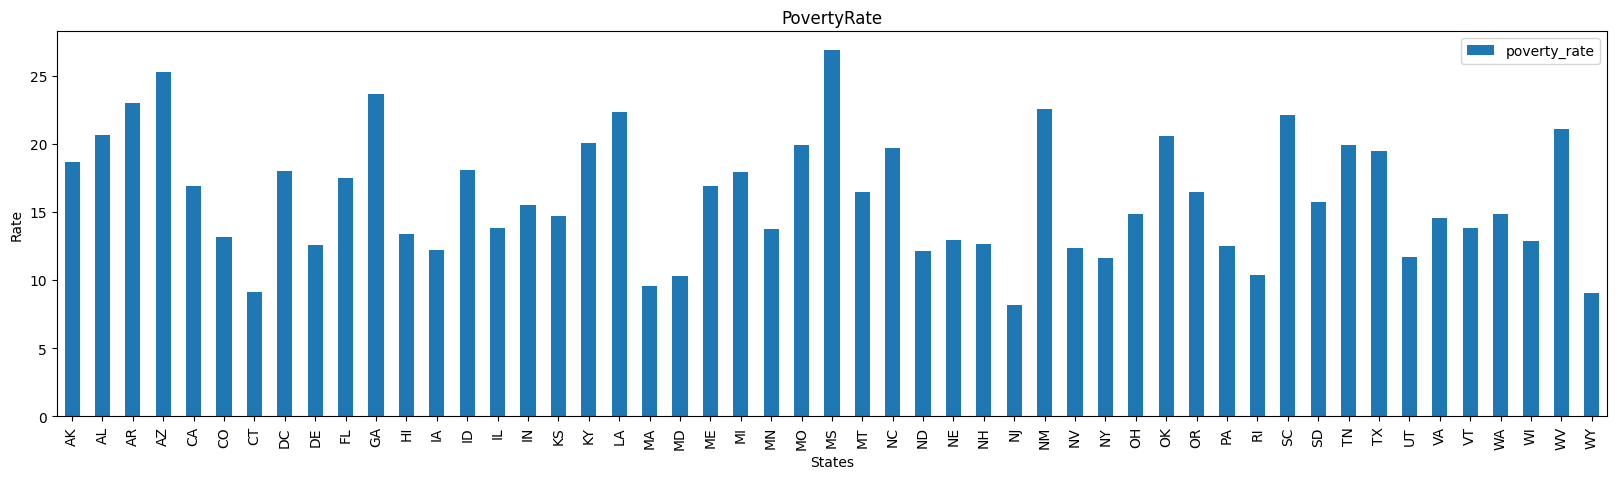

In [183]:
df_pct_poverty["poverty_rate"]=df_pct_poverty["poverty_rate"].replace("-","0.0").astype(float)
df1 = df_pct_poverty.groupby(['Geographic Area'])['poverty_rate'].mean()
print("Max Rate",df1.idxmax(skipna=True),":", df1.max())
print("Min Rate",df1.idxmin(skipna=True),":",df1.min())
df1 =pd.DataFrame(df1)
df1.plot(kind='bar',title='PovertyRate',ylabel='Rate',xlabel='States',figsize=(20,5))
df1.to_excel("povertratebystates.xlsx")



# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

Max Rate MA : 92.02845528455285
Min Rate TX : 74.08694905552375


<AxesSubplot: title={'center': 'School Graduation Rate'}, xlabel='States', ylabel='Rate'>

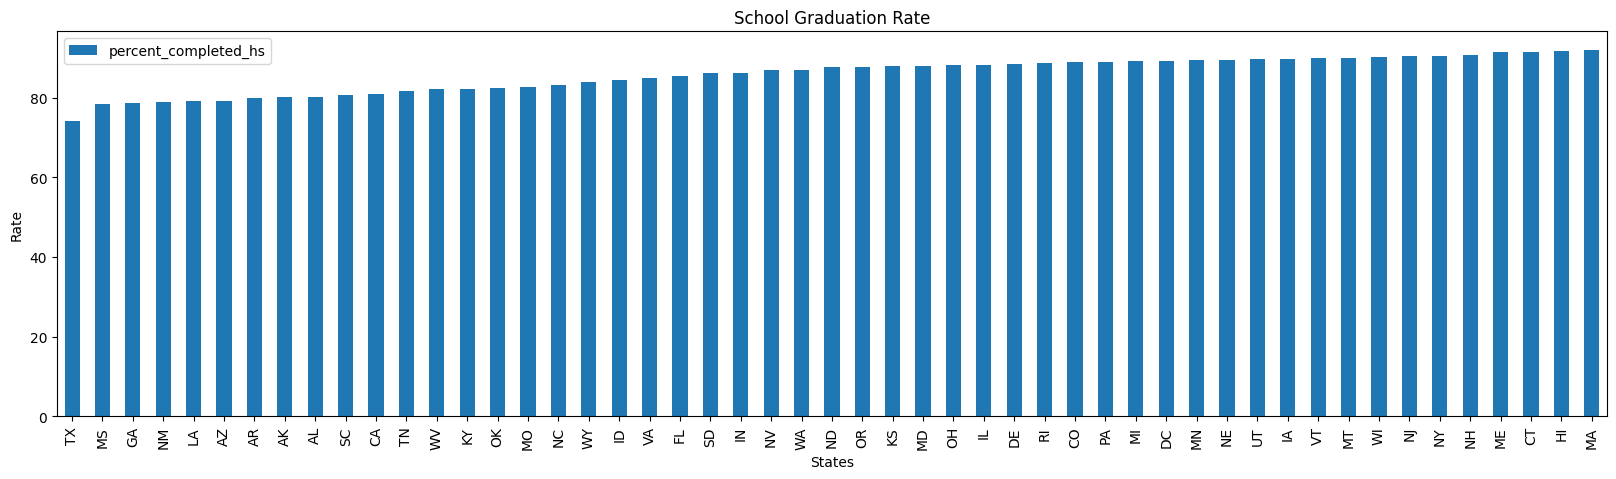

In [184]:
df_pct_completed_hs["percent_completed_hs"]=df_pct_completed_hs["percent_completed_hs"].replace("-","0.0").astype(float)
df2 = df_pct_completed_hs.groupby(['Geographic Area'])['percent_completed_hs'].mean()
print("Max Rate",df2.idxmax(skipna=True),":", df2.max())
print("Min Rate",df2.idxmin(skipna=True),":",df2.min())
df2=pd.DataFrame(df2)
df2=df2.sort_values('percent_completed_hs')
df2.plot(kind='bar',title='School Graduation Rate',ylabel='Rate',xlabel='States',figsize=(20,5))

In [185]:
print(df2)

                 percent_completed_hs
Geographic Area                      
TX                              74.09
MS                              78.47
GA                              78.63
NM                              78.97
LA                              79.12
AZ                              79.22
AR                              79.95
AK                              80.10
AL                              80.16
SC                              80.65
CA                              80.82
TN                              81.63
WV                              82.14
KY                              82.22
OK                              82.46
MO                              82.79
NC                              83.14
WY                              83.97
ID                              84.42
VA                              84.88
FL                              85.46
SD                              86.18
IN                              86.32
NV                              87.05
WA          

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

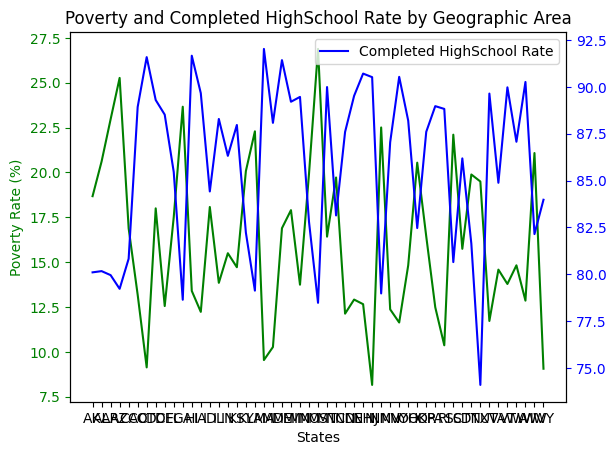

                 poverty_rate  percent_completed_hs
Geographic Area                                    
AK                      18.68                 80.10
AL                      20.61                 80.16
AR                      22.96                 79.95
AZ                      25.27                 79.22
CA                      16.89                 80.82
CO                      13.19                 88.93
CT                       9.14                 91.59
DC                      18.00                 89.30
DE                      12.56                 88.52
FL                      17.51                 85.46
GA                      23.66                 78.63
HI                      13.40                 91.67
IA                      12.23                 89.67
ID                      18.08                 84.42
IL                      13.85                 88.29
IN                      15.50                 86.32
KS                      14.72                 87.97
KY          

In [186]:
df_hs = pd.DataFrame(df_pct_completed_hs.groupby(['Geographic Area'])['percent_completed_hs'].mean())
df_poverty = pd.DataFrame(df_pct_poverty.groupby(['Geographic Area'])['poverty_rate'].mean())
combined_df = pd.merge(df_poverty, df_hs, on='Geographic Area')
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(combined_df['poverty_rate'], 'g-', label='Poverty Rate')
ax2.plot(combined_df['percent_completed_hs'], 'b-', label='Completed HighSchool Rate')
ax1.tick_params('y', colors='g')
ax2.tick_params('y', colors='b')
ax1.set_ylabel('Poverty Rate (%)', color='g')
ax1.set_xlabel('States')
plt.title("Poverty and Completed HighSchool Rate by Geographic Area")
plt.legend(loc='best')
plt.show()
print(combined_df)


#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

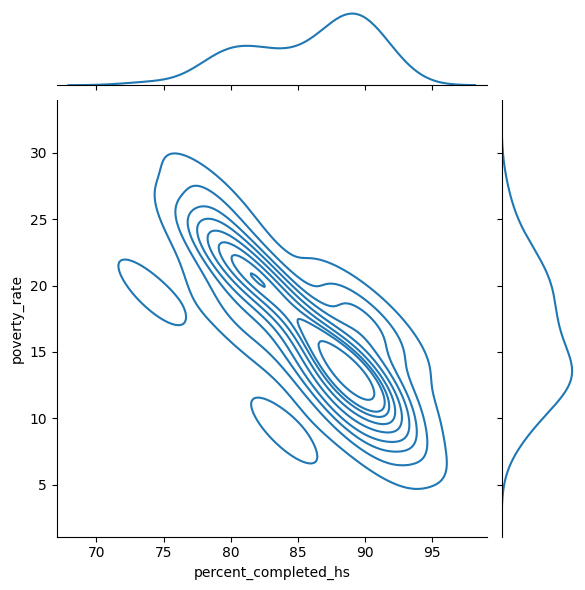

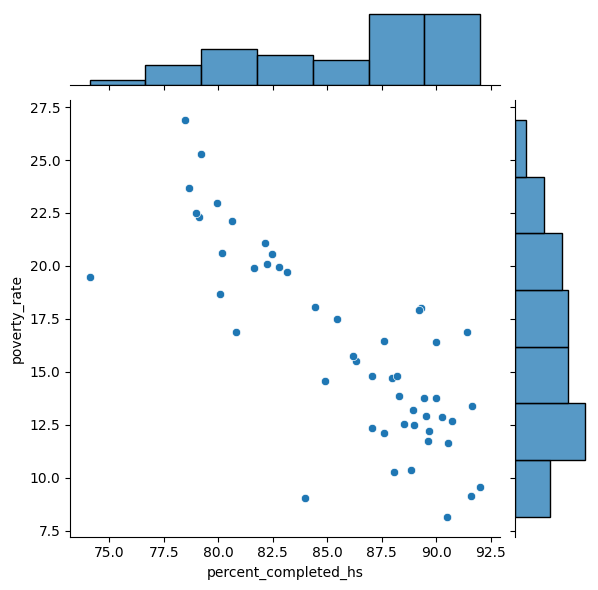

In [187]:
kde=sns.jointplot(x=df_hs["percent_completed_hs"],y=df_poverty["poverty_rate"],data=df1,
kind='kde')
g=sns.jointplot(x=df_hs["percent_completed_hs"],y=df_poverty["poverty_rate"],data=df1)

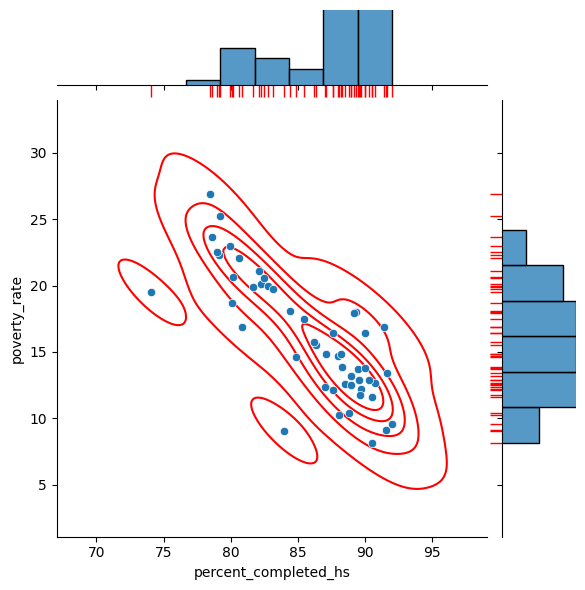

In [188]:
g=sns.jointplot(x=df_hs["percent_completed_hs"],y=df_poverty["poverty_rate"],data=df1)
g.plot_joint(sns.kdeplot,color="r",zorder=0,levels=6)
g.plot_marginals(sns.rugplot,color="r",height=-.15,clip_on=False)

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

<AxesSubplot: xlabel='percent_completed_hs', ylabel='poverty_rate'>

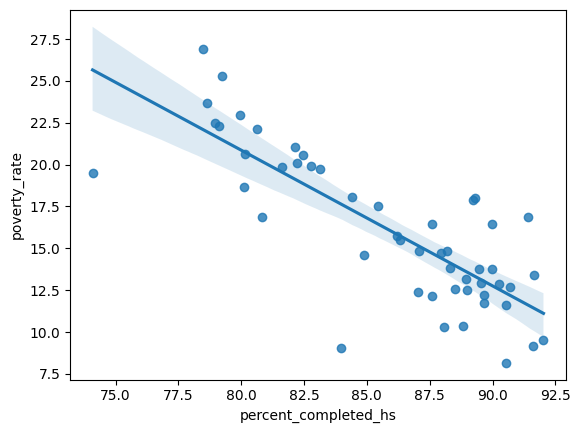

In [189]:
sns.regplot(x=df_hs["percent_completed_hs"],y=df_poverty["poverty_rate"])

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the the white, black, hispanic, asian and native american population in each US State using a bar chart.

In [190]:
df_share_race_city['share_white']=df_share_race_city['share_white'].replace("(X)","0").astype(float)
df_share_race_city['share_black']=df_share_race_city['share_black'].replace("(X)","0").astype(float)
df_share_race_city['share_native_american']=df_share_race_city['share_native_american'].replace("(X)","0").astype(float)
df_share_race_city['share_asian']=df_share_race_city['share_asian'].replace("(X)","0").astype(float)
df_share_race_city['share_hispanic']=df_share_race_city['share_hispanic'].replace("(X)","0").astype(float)
df3=df_share_race_city.groupby('Geographic area')['share_white','share_black','share_native_american','share_asian','share_hispanic'].sum()
print(df3)

                 share_white  share_black  share_native_american  share_asian  \
Geographic area                                                                 
AK                 16,068.80       199.70              16,144.40       488.70   
AL                 41,909.20    13,480.30                 381.10       277.30   
AR                 42,441.20     8,816.60                 411.10       258.10   
AZ                 27,028.00       430.50              12,894.00       327.70   
CA                108,949.30     4,081.10               2,612.20     8,441.40   
CO                 40,197.90       420.30                 744.20       528.90   
CT                 12,313.10       713.90                  93.90       427.50   
DC                     38.50        50.70                   0.30         3.50   
DE                  5,794.70     1,169.90                  39.80       152.00   
FL                 72,378.70    12,301.20                 419.00     1,487.40   
GA                 39,182.30

C:\Users\Cann\AppData\Local\Temp\ipykernel_3540\413390890.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df3=df_share_race_city.groupby('Geographic area')['share_white','share_black','share_native_american','share_asian','share_hispanic'].sum()


<AxesSubplot: title={'center': 'white, black, hispanic, asian and native american population in each US State'}, xlabel='Race', ylabel='Count'>

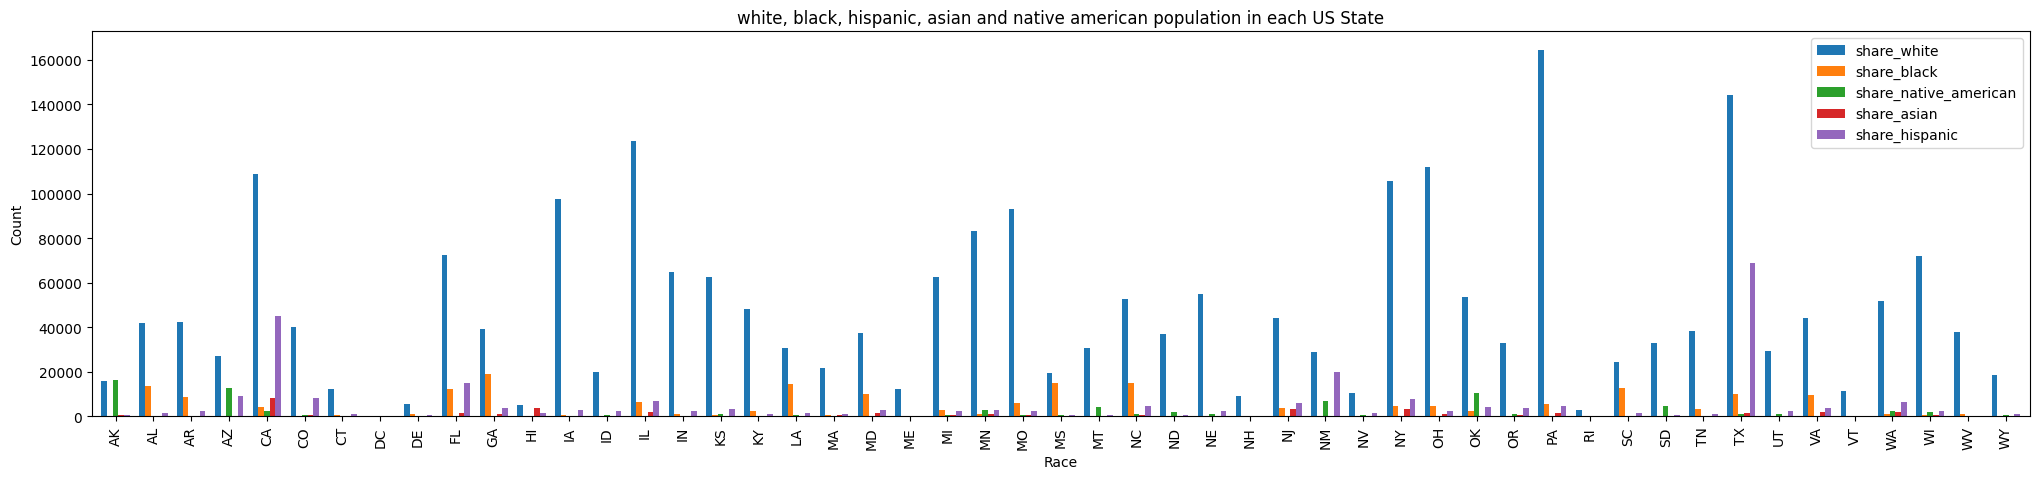

In [191]:
df3.plot(kind='bar',title='white, black, hispanic, asian and native american population in each US State',ylabel='Count',xlabel='Race',figsize=(25,5),width=0.75)

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64


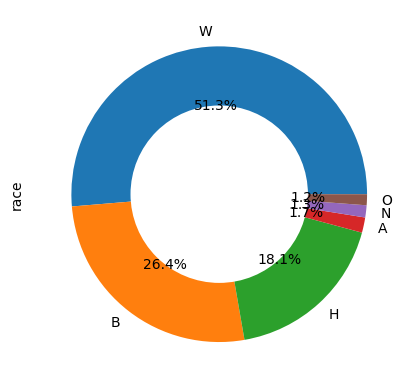

In [192]:

race = df_fatalities["race"].value_counts()
print(race)
race.plot.pie(autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

M    2428
F     107
Name: gender, dtype: int64


<AxesSubplot: xlabel='Gender', ylabel='Count'>

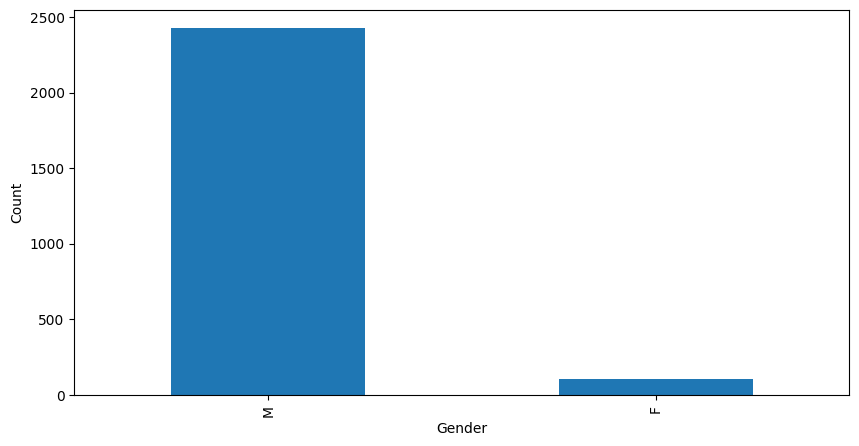

In [193]:
df4=df_fatalities["gender"].value_counts()
print(df4)
df4.plot.bar(figsize=(10,5),xlabel="Gender",ylabel="Count")

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [194]:
gender_manner_crosstab = pd.crosstab(index=df_fatalities['manner_of_death'], columns=df_fatalities['gender'])
print(gender_manner_crosstab)

gender              F     M
manner_of_death            
shot              102  2261
shot and Tasered    5   167


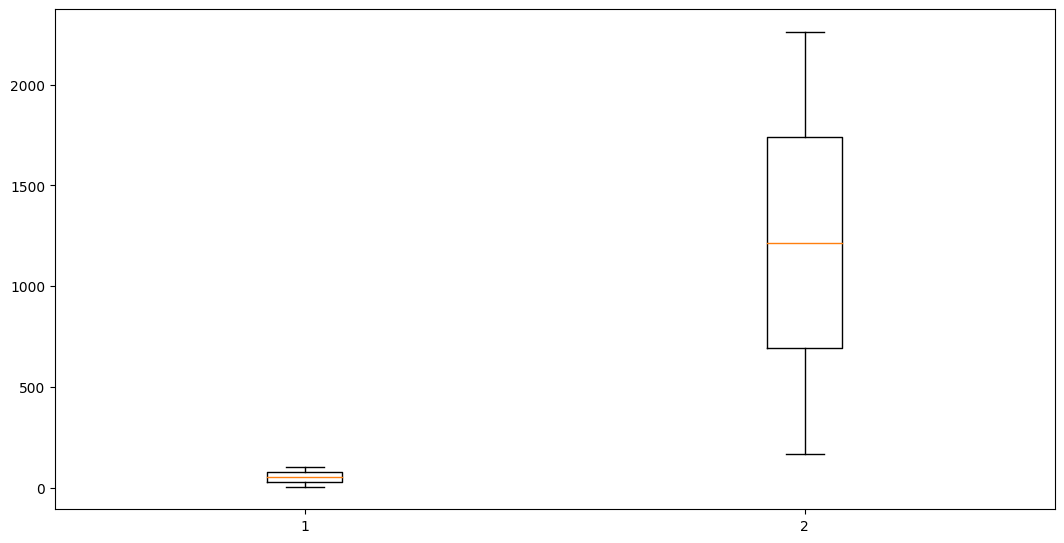

In [195]:
fig = plt.figure(figsize =(10, 5))
ax = fig.add_axes([0, 0, 1, 1])
bp=ax.boxplot(gender_manner_crosstab)
plt.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

Percentage of unarmed people killed:% 6.7695961995249405
Unarmed People 171
Armend People 2355


<AxesSubplot: >

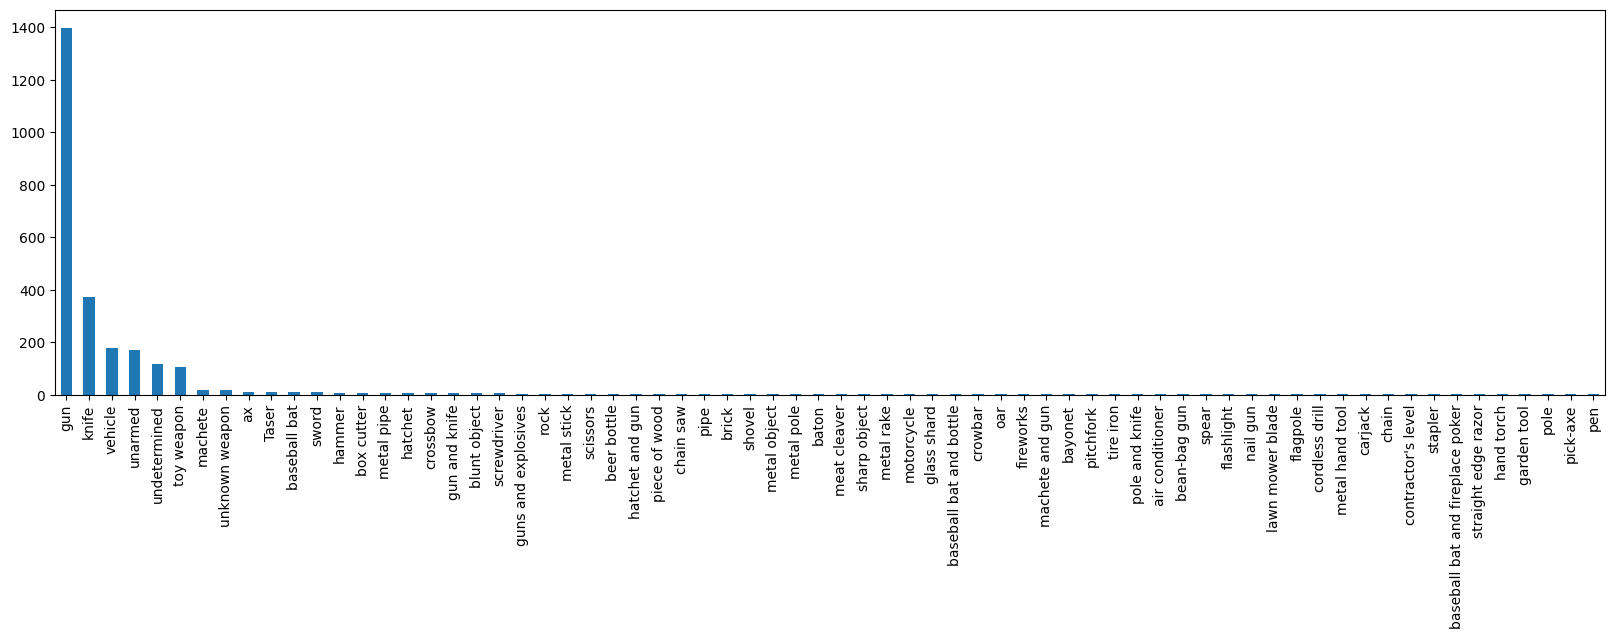

In [196]:
unarmedcount=df_fatalities.armed.value_counts()['unarmed']
total=df_fatalities.armed.value_counts().sum()
percentage= unarmedcount/total*100
print("Percentage of unarmed people killed:%",percentage)
print("Unarmed People",unarmedcount)
print("Armend People",total-unarmedcount)
x=df_fatalities.armed.value_counts()
x.plot.bar(figsize=(20,5))

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [197]:
age= df_fatalities[df_fatalities.age < 25]
print("Percentage:",len(age)/len(df_fatalities)*100)

Percentage: 17.75147928994083


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

c:\Users\Cann\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1826: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


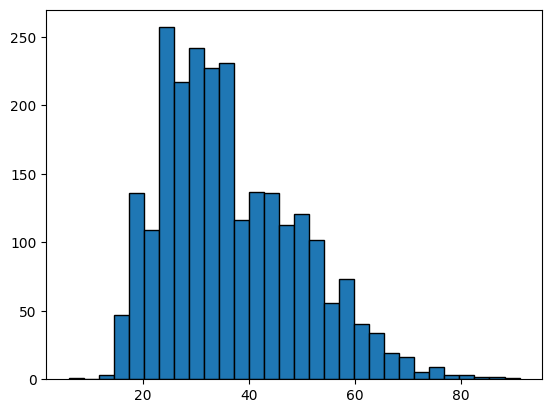

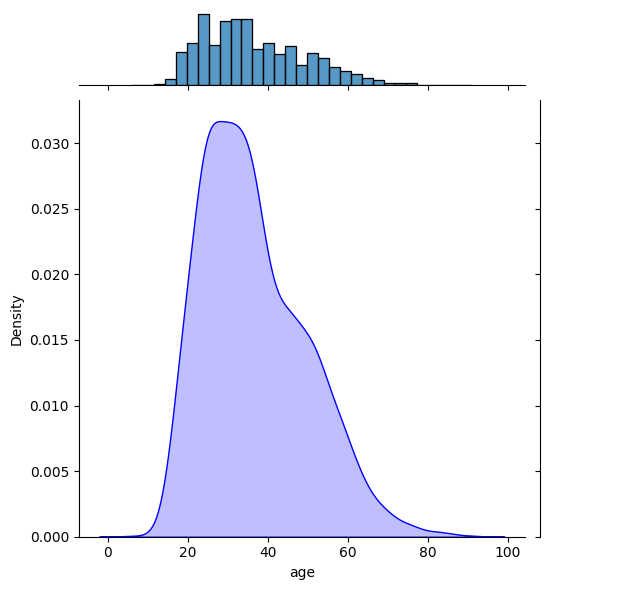

In [198]:
killedage=df_fatalities.age
plt.hist(killedage,bins=30,edgecolor="black")
g=sns.jointplot(x=killedage,data=df_fatalities)
g.plot_joint(sns.kdeplot,color="b",zorder=0,levels=6,shade=True)

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

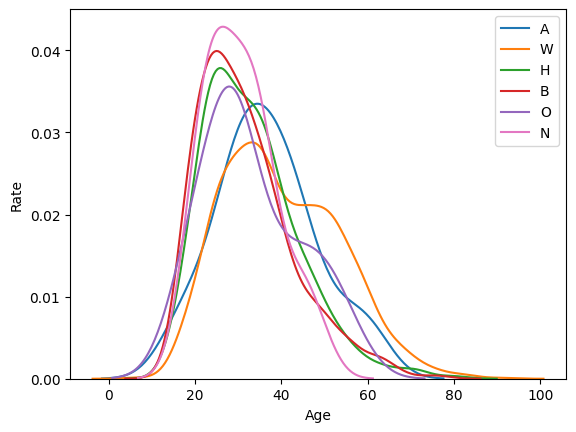

In [199]:
races= df_fatalities['race']
for race in races.unique():
    sns.kdeplot(df_fatalities.loc[races == race, 'age'], label=race)
plt.xlabel('Age')
plt.ylabel('Rate')
plt.legend()
plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64


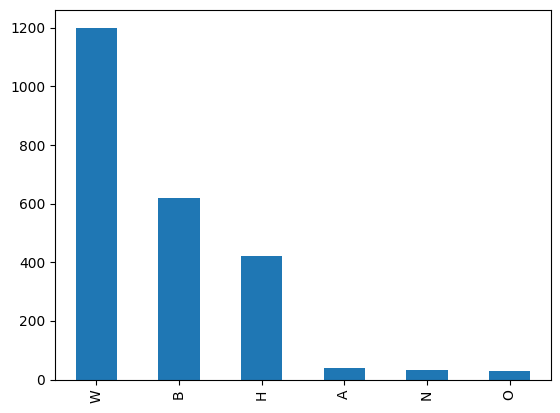

In [200]:
df4 = df_fatalities['race'].value_counts()
df4.plot(kind='bar')
print(df4)

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [201]:
rateofmentalillness=(df_fatalities['signs_of_mental_illness'].value_counts()[True]/len(df_fatalities['signs_of_mental_illness']))*100
print("Percentage:",rateofmentalillness)


Percentage: 24.970414201183434


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

<AxesSubplot: >

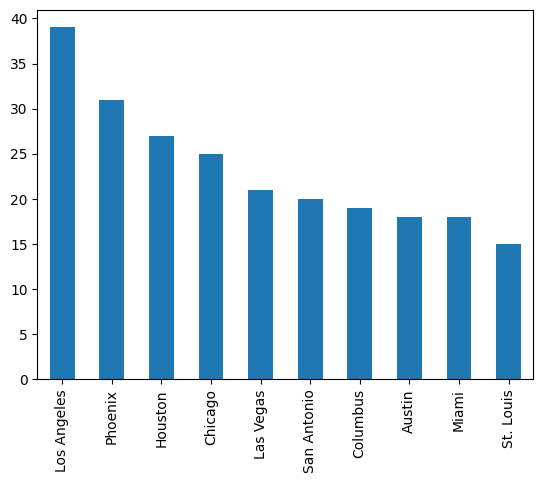

In [202]:
df4=df_fatalities['city'].value_counts()
df4=df4.sort_values(ascending=False).head(10)
df4.plot.bar()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [203]:
shareofrace = df_fatalities[df_fatalities['city'].isin(df4.index)].groupby(['city', 'race']).size().reset_index(name='counts')
shareofrace['percentage'] = shareofrace.groupby(['city'])['counts'].apply(lambda x: x/x.sum())*100
shareofrace['rate'] = shareofrace.groupby(['city'])['counts'].apply(lambda x: x/df4[df4.index.isin(shareofrace.index[x])])
print(shareofrace)

           city race  counts  percentage  rate
0        Austin    B       3       16.67   NaN
1        Austin    H       2       11.11   NaN
2        Austin    W      13       72.22   NaN
3       Chicago    B      21       87.50   NaN
4       Chicago    H       1        4.17   NaN
5       Chicago    W       2        8.33   NaN
6      Columbus    B      11       61.11   NaN
7      Columbus    O       1        5.56   NaN
8      Columbus    W       6       33.33   NaN
9       Houston    A       1        3.85   NaN
10      Houston    B      15       57.69   NaN
11      Houston    H       6       23.08   NaN
12      Houston    N       1        3.85   NaN
13      Houston    W       3       11.54   NaN
14    Las Vegas    B       3       17.65   NaN
15    Las Vegas    H       5       29.41   NaN
16    Las Vegas    W       9       52.94   NaN
17  Los Angeles    A       1        2.78   NaN
18  Los Angeles    B      10       27.78   NaN
19  Los Angeles    H      19       52.78   NaN
20  Los Angel

C:\Users\Cann\AppData\Local\Temp\ipykernel_3540\1715068204.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  shareofrace['percentage'] = shareofrace.groupby(['city'])['counts'].apply(lambda x: x/x.sum())*100
C:\Users\Cann\AppData\Local\Temp\ipykernel_3540\1715068204.py:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

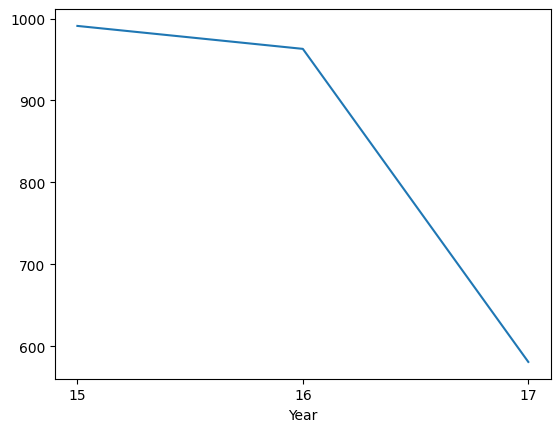

In [204]:
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")
df_fatalities["date"]=df_fatalities["date"].str[6:9].sort_values(ascending=True)
df_fatalities["date"]=df_fatalities["date"].str.replace("/",".",1)
deneme=df_fatalities.groupby('date')['gender'].count().reset_index(name="count")
deneme.sort_values(by="date",ascending=True)
plt.xlabel('Year')
plt.plot(deneme["date"],deneme["count"])